C:\Users\marce\AppData\Local\Temp\ipykernel_14752\2418179598.py:97: RuntimeWarning: invalid value encountered in sqrt
  z = x0 * y0 * (1-((x0**2)/9)-((y0**2)/64))**0.5     # Caso o codigo venha ser usado em outra funcao, isso deve ser corrigido também
C:\Users\marce\anaconda3\lib\site-packages\matplotlib\animation.py:889: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you have outputted the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(
MovieWriter ffmpeg unavailable; using Pillow instead.


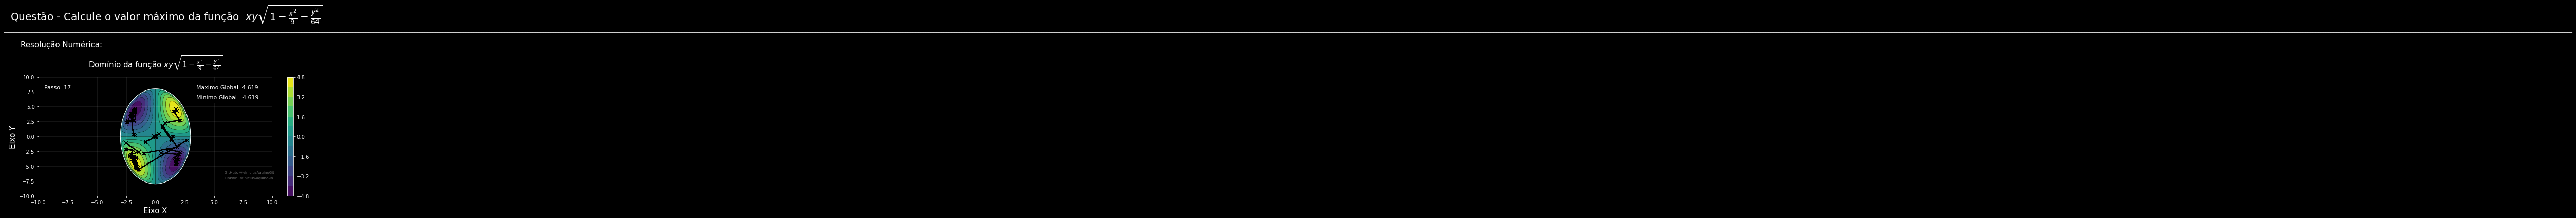

In [2]:
import random
import math
import numpy as np
from sympy import *
import matplotlib.pyplot as plt
import matplotlib.animation as animation

x, y, z, t = symbols("x y z t") # Define símbolos para variáveis genericas
k, m, n = symbols("k m n", integer=True)  # Define símbolos para variáveis inteiras
f, g, h = map(Function, 'fgh') # define símbolos para funções


def vetorGradiente(funcao):         # Funcao que define o vetor gradiente de uma funcao f(x,y)
    diffX = diff(funcao, x)
    diffY = diff(funcao, y)
    return Matrix([diffX, diffY])


def newton(f, x0=0, eps=0.0001, itmax=100):          # Metodo de Newton para raízes de uma funcao de uma variavel

    df = diff(f, x)  # Diferencia a função recebida
    erro = 100
    L = range(1, itmax + 1)  # Vetor com o numero de iterações maximas
    iteracao = 0  # Contador de iteraões
    a = x0  # Ponto que o método será aplicado

    for i in L:  # Itera o vetor de iterações máximas

        raiz = round(a,5)  # Salva o ponto a ser testado na variável raiz e limita o numero de casas para não atrasar o processamento

        if df.subs([(x, raiz)]) != 0:  # se a derivada for zero naquele ponto, não é possível realizar a operação

            raiz = raiz - f.subs([(x, raiz)]) / df.subs([(x, raiz)])  # Acha a nova raiz a partir do método
            erro = abs(raiz - a)  # Qual a distância dele para a raíz anterior?

            a = raiz  # Salva essa raiz na variável a
            iteracao = i
        else:

            iteracao = itmax + 1  # Atribui a iteração maxima, caso não tenha sido possivel realizar a operação
            break  # Pode sair do loop

        if abs(erro) <= eps:  # Se o erro for menor que o epsilon fixado, pode sair
            break

    if iteracao > itmax:  # Se as iterações excedeu, retorna 0.25
        iteracao = 0.25
    elif iteracao == itmax:  # Se as iterações foram precisamente as mesmas do máximo, re
        iteracao = 0.75
    return [round(raiz, 5), round(erro, 5), iteracao]




def pontoOtimoFuncaoDuasVariaveis(f, p0, eps=0.001):        # Funcao que otimiza funcoes bivariadas

    gradiente = vetorGradiente(f)           # Calcula o vetor gradiente de f(x,y)

    z0 = f.subs([(x, p0[0]), (y, p0[1])])  # Ponto inicial da iteração

    pontos = [[p0[0], p0[1], z0]]          # Salva a informação
    e = math.inf

    while e > eps:
        v = p0 - x * (gradiente.subs([(x, p0[0]), (y, p0[1])]))  # Vetor paralelo ao gradiente e que passa por p0
        g = f.subs([(x, v[0]), (y, v[1])])                      # Funcao parametrizada em uma só varíavel do vetor v

        x1 = newton(diff(g))[0]  # Ponto otimo da funcao x -- reparar que ela diferenciada antes de ir para a funcao newton

        p0 = p0 - x1 * (gradiente.subs([(x, p0[0]), (y, p0[1])]))  # Novo passo que o vetor gradiente deu
        z1 = f.subs([(x, p0[0]), (y, p0[1])])  # Novo valor da funcao
        e = abs(z1 - z0)
        z0 = z1

        if z0.is_real:
            pontos.append([p0[0], p0[1], z0])   # Guarda os valores
        else:
            break   # Se nao for real, saiu do domínio. O que não quer dizer que não vá convergir, mas computacionalmente
                    # É muito custo e acaba não compensando

    return pontos


def grafico(pontosIniciais):  

    #---------- textos da imagem ------------------- #
    fig.text(0.02,0.9,'Questão - Calcule o valor máximo da função  ' + r'$ x y  \sqrt{1 - \frac{x^2}{9} - \frac{y^2}{64}}$', fontsize=20)
    fig.text(0.05,0.78,'Resolução Numérica:', fontsize=15)
    fig.text(0, 0.85, 1000*'_', fontsize=10)

    # --------- Curva de nível da funcao --------- #

    npts = 20000
    x0 = np.random.uniform(-3,3, npts)
    y0 = np.random.uniform(-8, 8, npts)

    z = x0 * y0 * (1-((x0**2)/9)-((y0**2)/64))**0.5     # Caso o codigo venha ser usado em outra funcao, isso deve ser corrigido também

    ax.tricontour(x0[np.isfinite(z)], y0[np.isfinite(z)], z[np.isfinite(z)], levels=14, linewidths=0.5, colors='k')
    cntr2 = ax.tricontourf(x0[np.isfinite(z)], y0[np.isfinite(z)], z[np.isfinite(z)], levels=14)

    fig.colorbar(cntr2, ax=ax)

    # ----------- Ajustes estéticos no grafico --------- #

    ax.set(xlim=(-10, 10), ylim=(-10, 10))
    plt.subplots_adjust(hspace=0.5)

    ax.spines['right'].set_visible(False)  #
    ax.spines['top'].set_visible(False)

    ax.set_ylabel('Eixo Y', fontsize=15)
    ax.set_xlabel('Eixo X', fontsize=15)

    ax.set_title('Domínio da função ' + r'$ x y  \sqrt{1 - \frac{x^2}{9} - \frac{y^2}{64}}$', fontsize=15, y=1.0, pad=18)

    x1 = np.linspace(-3, 3, 200)
    ax.plot(x1, 8*(1-((x1**2)/9))**0.5, 'w', linewidth=1)
    ax.plot(x1, -8*(1-((x1**2)/9))**0.5, 'w', linewidth=1)

    ax.grid(alpha=0.1)
    plt.tight_layout()

    # ----------- Plota informacoes iniciais da otimização ----------


    xo = [x[0] for x in pontosIniciais]
    yo = [y[1] for y in pontosIniciais]
    plt.plot(xo, yo, 'xk')

    plt.text(-9.5,8,f'Passo: --', backgroundcolor='k', fontsize=11)
    plt.text(3.5,8, f'Maximo Global: --', backgroundcolor='k', fontsize=11)
    plt.text(3.5, 6.3, f'Minimo Global: --', backgroundcolor='k', fontsize=11)

    plt.text(5.9, -6.2, 'GitHub: @viniciusAquinoGit', backgroundcolor='k',color='#A9A9A9', fontsize=7, alpha = 0.6)
    plt.text(5.9, -7.2, 'Linkdln: /vinicius-aquino-in',backgroundcolor='k', color='#A9A9A9', fontsize=7, alpha = 0.6)

def dominio(x0,ymin, ymax, mask):       # Funcao responsável por garantir que os pontos iniciais estarão dentro do domínio
                                        # Caso venha ser usado outra função, ela precisa ser revisada
    y0 = random.uniform(ymax, ymin)
    if mask.subs([(x,x0),(y,y0)]) >= 0:
        return y0
    else:
        if y0>0:
            return dominio(x0,ymin, y0, mask)
        else:
            return dominio(x0, y0, ymax, mask)


def geraPontos(z, a):          # Gera a pontos iniciais dentro do dominio de z
    pontosIniciais = []

    for i in range(a):
        x0 = random.uniform(-3, 3)
        y0 = dominio(x0, -8, 8, 1 - ((x ** 2) / 64) - ((y ** 2) / 9))     # Isso precisa ser atualizado caso use-se outra função
        pontosIniciais.append(Matrix([x0, y0]))

    pontosTotais = []
    for i in pontosIniciais:
        pontosTotais.append(pontoOtimoFuncaoDuasVariaveis(z, i))       # Otimiza os a pontos gerados

    n = 0
    for i in pontosTotais:  # Conta qual foi o maior numero de passos dado
        if len(i) > n:
            n = len(i)
        else:
            continue

    return pontosIniciais, pontosTotais, n

#---------------------------------------------------------------------------------------------#

z = x * y * (1-((x**2)/9)-((y**2)/64))**0.5 # Funcao a ser otimizada
pontosIniciais, pontosTotais, n = geraPontos(z,15)   

plt.style.use('dark_background')
fig, axs = plt.subplots(figsize=(9, 6), ncols=1, nrows=3)   # Cria uma figura do matplotlib
for ax in axs:
    ax.remove()  # Exclui todos os subplots

gs = axs[1].get_gridspec()
ax = fig.add_subplot(gs[1:])    # Cria o que sera usado na curva de nivel

i = 0   # Contador de passos
maxGlobal = -math.inf
minGlobal = math.inf

def animacao(q):

    global pontosTotais, i, maxGlobal, minGlobal,ax
    if i <= n:
        for k in pontosTotais:  # Itera todos os pontos otimizados

                if i < len(k):
                    xPontos = [x[0] for x in k[:i]]
                    yPontos = [x[1] for x in k[:i]]
                    ax.plot(xPontos, yPontos, 'xk-')
                    z = k[i][2]

                else:
                    xPontos = [x[0] for x in k]         # Se o numero convergiu antes de n, então plote todos os dados
                    yPontos = [x[1] for x in k]
                    ax.plot(xPontos, yPontos, 'xk-')

                    z = k[-1][2]

                if z.is_real:                           # Se z é real, então cheque se é maior que o maximo ou menor que o minimo
                    if z > maxGlobal:
                        maxGlobal = z
                    elif z < minGlobal:
                        minGlobal = z
                    else:
                        pass
                else:
                    pass
            
        #------------- Atualiza as informações ---------------#
        plt.text(-9.5, 8, f'Passo: {i}', backgroundcolor='k', fontsize=11)
        plt.text(3.5, 8, f'Maximo Global: {round(maxGlobal, 3)}', backgroundcolor='k', fontsize=11)
        plt.text(3.5, 6.3, f'Minimo Global: {round(minGlobal, 3)}', backgroundcolor='k', fontsize=11)

        i += 1
    else:
        pass

ani = animation.FuncAnimation(fig, animacao,init_func=grafico(pontosIniciais), frames=n, interval=500)
ani.save('otimizando funcao.gif')
plt.show()

In [3]:
#sem gráfico

import random
import math
import time
from sympy import *

x, y, z, t = symbols("x y z t") # Define símbolos para variáveis genericas
k, m, n = symbols("k m n", integer=True)  # Define símbolos para variáveis inteiras
f, g, h = map(Function, 'fgh') # define símbolos para funções


def vetorGradiente(funcao):         # Funcao que define o vetor gradiente de uma funcao f(x,y)
    diffX = diff(funcao, x)
    diffY = diff(funcao, y)
    return Matrix([diffX, diffY])

def newton(f, x0=0, eps=0.0001, itmax=100):          # Metodo de Newton para raízes de uma funcao de uma variavel

    df = diff(f, x)  # Diferencia a função recebida
    erro = 100
    L = range(1, itmax + 1)  # Vetor com o numero de iterações maximas
    iteracao = 0  # Contador de iteraões
    a = x0  # Ponto que o método será aplicado

    for i in L:  # Itera o vetor de iterações máximas

        raiz = round(a,5)  # Salva o ponto a ser testado na variável raiz e limita o numero de casas para não atrasar o processamento

        if df.subs([(x, raiz)]) != 0:  # se a derivada for zero naquele ponto, não é possível realizar a operação

            raiz = raiz - f.subs([(x, raiz)]) / df.subs([(x, raiz)])  # Acha a nova raiz a partir do método
            erro = abs(raiz - a)  # Qual a distância dele para a raíz anterior?

            a = raiz  # Salva essa raiz na variável a
            iteracao = i
        else:

            iteracao = itmax + 1  # Atribui a iteração maxima, caso não tenha sido possivel realizar a operação
            break  # Pode sair do loop

        if abs(erro) <= eps:  # Se o erro for menor que o epsilon fixado, pode sair
            break

    if iteracao > itmax:  # Se as iterações excedeu, retorna 0.25
        iteracao = 0.25
    elif iteracao == itmax:  # Se as iterações foram precisamente as mesmas do máximo, re
        iteracao = 0.75
    return [round(raiz, 5), round(erro, 5), iteracao]


def pontoOtimoFuncaoDuasVariaveis(f, p0, eps=0.001):
    gradiente = vetorGradiente(f)           # Calcula o vetor gradiente de f(x,y)

    z0 = f.subs([(x, p0[0]), (y, p0[1])])  # Ponto inicial da iteração

    pontos = [[p0[0], p0[1], z0]]          # Salva a informação
    e = math.inf

    while e > eps:
        v = p0 - x * (gradiente.subs([(x, p0[0]), (y, p0[1])]))  # Vetor paralelo ao gradiente e que passa por p0
        g = f.subs([(x, v[0]), (y, v[1])])                      # Funcao parametrizada em uma só varíavel do vetor v

        x1 = newton(diff(g))[0]  # Ponto otimo da funcao x -- reparar que ela diferenciada antes de ir para a funcao newton

        p0 = p0 - x1 * (gradiente.subs([(x, p0[0]), (y, p0[1])]))  # Novo passo que o vetor gradiente deu
        z1 = f.subs([(x, p0[0]), (y, p0[1])])  # Novo valor da funcao
        e = abs(z1 - z0)
        z0 = z1

        if z0.is_real:
            pontos.append([p0[0], p0[1], z0])   # Guarda os valores
        else:
            break   # Se nao for real, saiu do domínio. O que não quer dizer que não vá convergir, mas computacionalmente
                    # É muito custo e acaba não compensando

    return pontos

def dominio(x0,ymin, ymax, mask):       # Funcao responsável por garantir que os pontos iniciais estarão dentro do domínio
                                        # Caso venha ser usado outra função, ela precisa ser revisada
    y0 = random.uniform(ymax, ymin)
    if mask.subs([(x,x0),(y,y0)]) >= 0:
        return y0
    else:
        if y0>0:
            return dominio(x0,ymin, y0, mask)
        else:
            return dominio(x0, y0, ymax, mask)


def geraPontos(z, a):          # Gera a pontos iniciais dentro do dominio de z
    pontosIniciais = []

    for i in range(a):
        x0 = random.uniform(-3, 3)
        y0 = dominio(x0, -8, 8, 1 - ((x ** 2) / 64) - ((y ** 2) / 9))
        pontosIniciais.append(Matrix([x0, y0]))

    pontosTotais = []
    for i in pontosIniciais:
        pontosTotais.append(pontoOtimoFuncaoDuasVariaveis(z, i))       # Otimiza os a pontos gerados

    n = 0
    for i in pontosTotais:  # Conta qual foi o maior numero de passos dado
        if len(i) > n:
            n = len(i)
        else:
            continue

    return pontosIniciais, pontosTotais, n


z = x * y * (1-((x**2)/9)-((y**2)/64))**0.5
maxGlobal = -math.inf
minGlobal = math.inf
m = 15
timeInc = time.time()

pontosIniciais, pontosTotais, n = geraPontos(z,m)

for i in pontosTotais:
    if i[-1][2] > maxGlobal:
        maxGlobal = i[-1][2]
    else:
        pass

    if i[-1][2] < minGlobal:
        minGlobal = i[-1][2]

timeFin = time.time() - timeInc

print(f'Numero de pontos gerados: {m}')
print(f'Maior número de passos dado até a convergencia: {n}')
print(f'Maximo global: {maxGlobal}')
print(f'Minimo global: {minGlobal}')
print(f'Tempo de execução:{timeFin}')

Numero de pontos gerados: 15
Maior número de passos dado até a convergencia: 19
Maximo global: 4.61739602892456
Minimo global: -4.61875229508255
Tempo de execução:18.916436672210693
